# *Predictive Modeling of Patient Readmission in Diabetes Cohort*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_diabetes = pd.read_csv('diabetic_data.csv')

In [3]:
df_ids = pd.read_csv('IDs_mapping.csv')

# Check imported data 

In [4]:
df_diabetes.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [5]:
df_ids.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [6]:
df_diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
diabetesMed                 object
readmitted                  object
dtype: object

In [7]:
len(df_diabetes)

101766

In [8]:
df_admit_type_id = df_ids[0:8]

In [9]:
df_discharge_id = df_ids[9:40]
df_discharge_id = df_discharge_id.rename(columns=df_discharge_id.iloc[0]).drop(df_discharge_id.index[0])

In [10]:
df_admit_source_id = df_ids[41:67]
df_admit_source_id = df_admit_source_id.rename(columns=df_admit_source_id.iloc[0]).drop(df_admit_source_id.index[0])

In [11]:
df_diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
diabetesMed                 0
readmitted                  0
dtype: int64

In [12]:
#Percentage of missing values
100*df_diabetes.eq('?').sum()/len(df_diabetes)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
diabetesMed                  0.000000
readmitted                   0.000000
dtype: float

In [13]:
#Weight has a very high number of missing values, drop the feature
df_diabetes = df_diabetes.drop('weight',axis=1)

In [14]:
#Look at other features
for c in df_diabetes.columns[2:]:
    print(df_diabetes[c].value_counts(dropna=False))

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64
7     57494
1     29565
17     6781


# Exploratory Data Analysis

In [15]:
df_diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [16]:
#Categorical features:
#race
#gender
#age
#admission type
#discharge disposition
#admission source
#payer code
#most common medical specialty
#most common diag 1
#most common diag 2
#most common diag 3
#number diagnoses

In [17]:
list_cat_cols = ['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3']

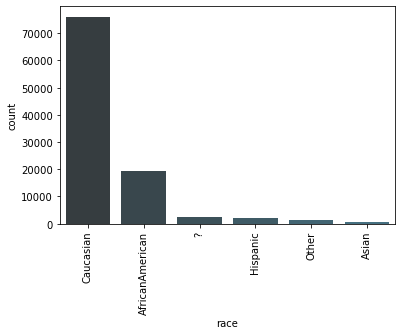

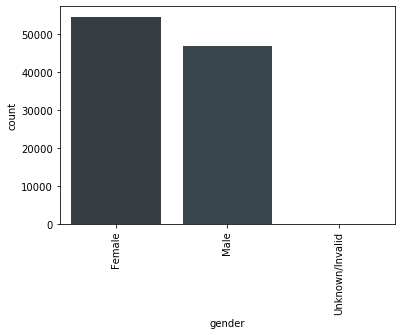

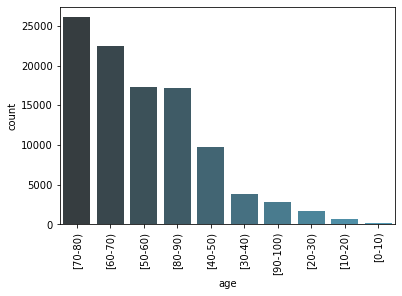

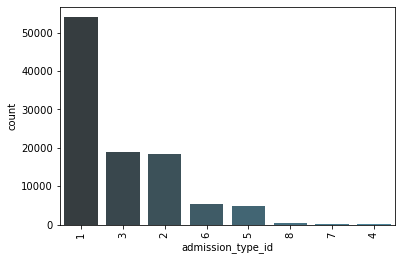

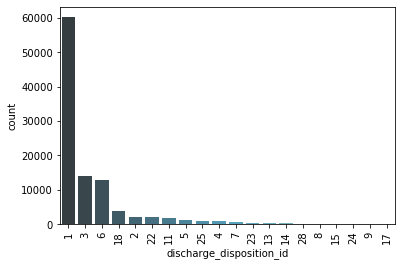

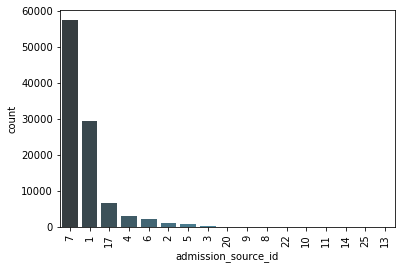

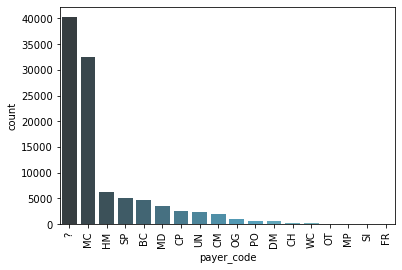

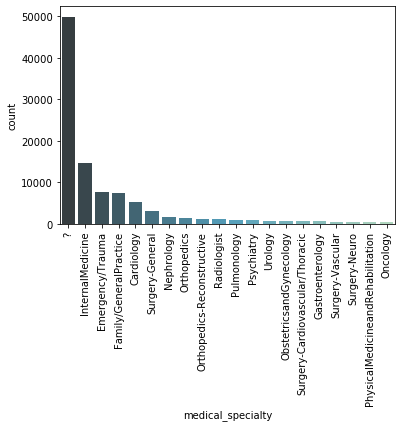

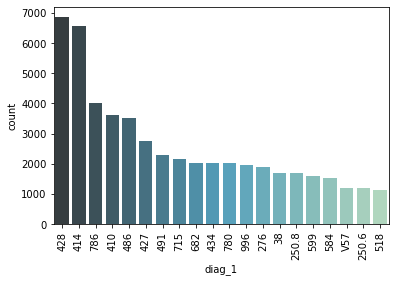

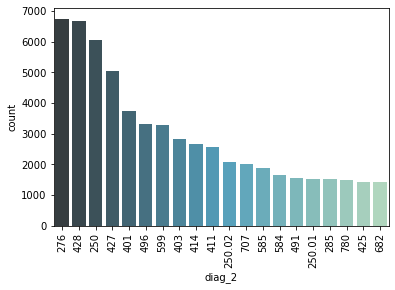

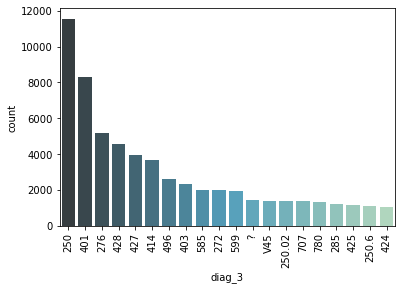

In [18]:
for c in list_cat_cols:
    ax_cat = sns.countplot(data=df_diabetes, x=c, order=df_diabetes[c].value_counts().iloc[:20].index, palette=sns.set_palette(sns.color_palette('GnBu_d', 20)))
    ax_cat.set_xticklabels(ax_cat.get_xticklabels(), rotation=90)
    plt.show()

In [19]:
#Numerical features:
#time in hospital
#num lab procedures
#num procedures
#num medications
#num outpatient
#num emergency
#num inpatient

In [20]:
list_num_cols = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

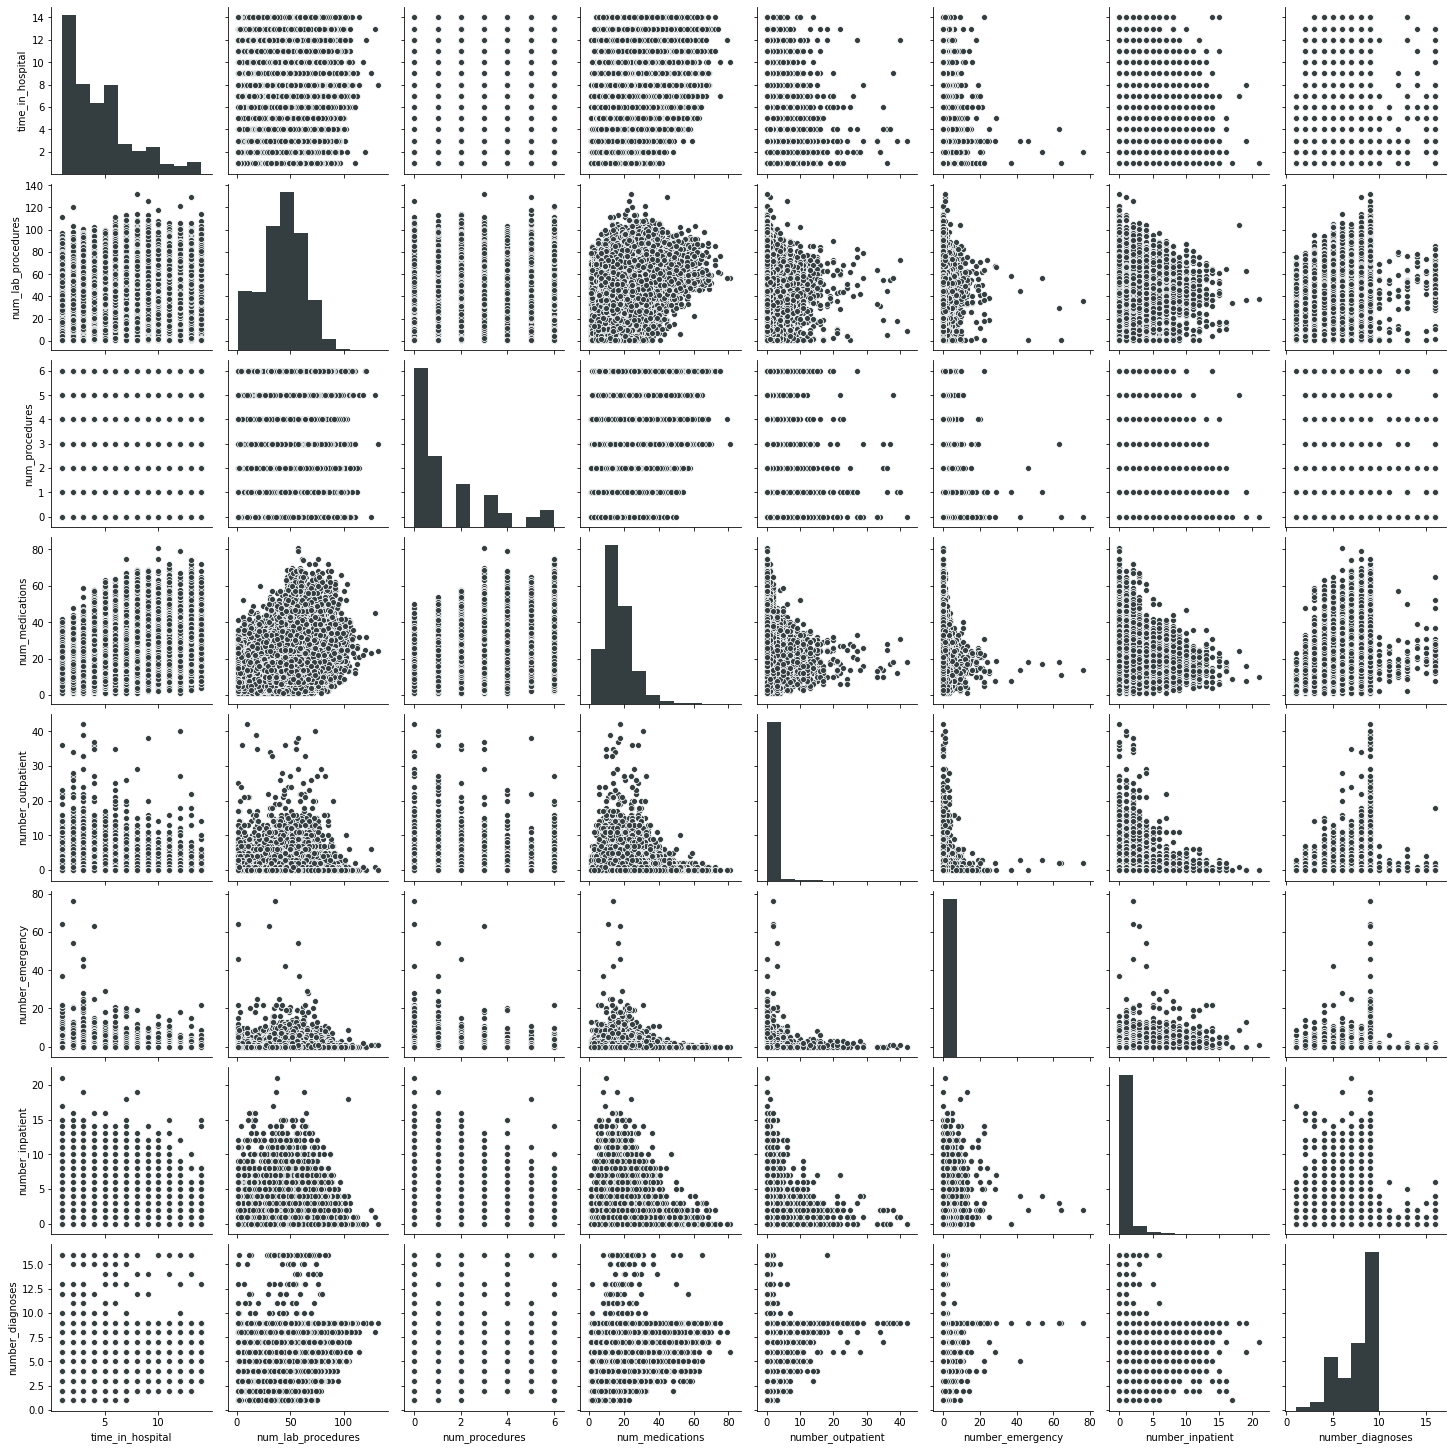

In [21]:
sns.pairplot(data=df_diabetes[list_num_cols])

In [60]:
df_diabetes_cat = pd.read_csv('diabetic_data.csv')

In [61]:
100*df_diabetes_cat.readmitted.value_counts()/len(df_diabetes_cat)

NO     53.911916
>30    34.928169
<30    11.159916
Name: readmitted, dtype: float64

In [59]:
100*df_diabetes.readmitted.value_counts()/len(df_diabetes)

3    53.911916
2    34.928169
1    11.159916
Name: readmitted, dtype: float64

# Data Preparation

Transform diagnoses data into different levels of diagnosis detail
```HTML
Diagnosis code format
Example: S32.010A -> Wedge compression fracture of first lumbar vertebra, initial encounter for closed fracture

                     |Chapter  |Category  |4th char |5th char |6th char |extension  
---------------------------------------------------------------------
Example:             |S 	   |S32       |0	    |1        |0        |A  
---------------------------------------------------------------------
```


In [22]:
def icd10_len(df, fldname, prefix):
    icd10_length=pd.DataFrame()
    fld = df[fldname]
    df[prefix+' ICD10_n_ofchars'] = fld.str.len() #compute length of the icd10 code
    df[prefix+' ICD10_n_ofchars'] = np.where(df[prefix+' ICD10_n_ofchars']>3, df[prefix+' ICD10_n_ofchars']-1, df[prefix+' ICD10_n_ofchars'])
    return df

def icd10_chapter(df, fldname, prefix):
    fld = df[fldname]
    df[prefix+' ICD10_chapter'] = fld.astype(str).str[0] #extracts first character (chapter)
    return df

def icd10_category(df, fldname, prefix):
    fld = df[fldname]
    df[prefix+' ICD10_category'] = fld.astype(str).str[:3]
    return df

def icd10_4(df, fldname, prefix):
    fld = df[fldname]
    icd10_len(df, fldname, prefix)
    df[prefix+' ICD10_4'] = np.where(df[prefix+' ICD10_n_ofchars']>3, fld.astype(str).str[:5], np.nan)                  
    return df

def icd10_5(df, fldname, prefix):
    fld = df[fldname]
    icd10_len(df, fldname, prefix)
    df[prefix+' ICD10_5'] = np.where(df[prefix+' ICD10_n_ofchars']>4, fld.astype(str).str[:6], np.nan)                  
    return df

def icd10_6(df, fldname, prefix):
    fld = df[fldname]
    icd10_len(df, fldname, prefix)
    df[prefix+' ICD10_6'] = np.where(df[prefix+' ICD10_n_ofchars']>5, fld.astype(str).str[:7], np.nan)                  
    return df


def icd10_ext(df, fldname, prefix):
    fld = df[fldname]
    icd10_len(df, fldname, prefix)
    df[prefix+' ICD10_ext'] = np.where(df[prefix+' ICD10_n_ofchars']>6, fld.astype(str).str[:8], np.nan)                  
    return df


def split_icd10(df, fldname, prefix, keep=True): #this function splits icd10 codes into their components
    if keep == True:
        to_keep = df[fldname]
    icd10_len(df,fldname, prefix)         
    icd10_chapter(df,fldname, prefix)         
    icd10_category(df,fldname, prefix)         
    icd10_4(df,fldname, prefix)         
    icd10_5(df,fldname, prefix)         
    icd10_6(df,fldname, prefix)
    icd10_ext(df, fldname, prefix)
    if keep == True:
        df[fldname] = to_keep
    return  df

In [23]:
#From previous research, it was found that Category and Chapter of the diagoses codes have more predictive power, so extract those
for d in [1,2,3]:
    df_diabetes = icd10_chapter(df_diabetes, 'diag_'+str(d), 'd'+str(d)+'_')
    df_diabetes = icd10_category(df_diabetes, 'diag_'+str(d), 'd'+str(d)+'_')

In [24]:
df_diabetes.head().T[-6:]

,0,1,2,3,4
d1_ ICD10_chapter,2,2,6,8,1
d1_ ICD10_category,250,276,648,8,197
d2_ ICD10_chapter,?,2,2,2,1
d2_ ICD10_category,?,250,250,250,157
d3_ ICD10_chapter,?,2,V,4,2
d3_ ICD10_category,?,255,V27,403,250


In [25]:
#Encode age brackets
df_diabetes['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [26]:
dict_age = {'[0-10)':0, '[10-20)':10, '[20-30)':20, '[30-40)':30, '[40-50)':40, '[50-60)':50,
       '[60-70)':60, '[70-80)':70, '[80-90)':80, '[90-100)':90}
df_diabetes = df_diabetes.replace({'age': dict_age})
df_diabetes.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,max_glu_serum,A1Cresult,diabetesMed,readmitted,d1_ ICD10_chapter,d1_ ICD10_category,d2_ ICD10_chapter,d2_ ICD10_category,d3_ ICD10_chapter,d3_ ICD10_category
0,2278392,8222157,Caucasian,Female,0,6,25,1,1,?,...,None,None,No,NO,2,250,?,?,?,?
1,149190,55629189,Caucasian,Female,10,1,1,7,3,?,...,None,None,Yes,>30,2,276,2,250,2,255


In [27]:
list_num_cols = []
list_cat_cols = []
for t in range(len(df_diabetes.columns)):
    if df_diabetes.dtypes[t] == 'int64':
        list_num_cols.append(df_diabetes.columns[t])
    else:
        list_cat_cols.append(df_diabetes.columns[t])

In [28]:
list_cat_cols

['race',
 'gender',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'diabetesMed',
 'readmitted',
 'd1_ ICD10_chapter',
 'd1_ ICD10_category',
 'd2_ ICD10_chapter',
 'd2_ ICD10_category',
 'd3_ ICD10_chapter',
 'd3_ ICD10_category']

In [29]:
#Label encode categorical variables (note: for certain variables one-hot encoding would be more appropriate, but too many columns cause a memory error)
def numericalize(df, col, name, max_n_cat):

    if not (pd.api.types.is_numeric_dtype(df[col]) and ( max_n_cat is None )):
        df[name] = pd.Categorical(df[col]).codes+1
    return df[name]

In [30]:
for cc in list_cat_cols:
    max_n_cat = df_diabetes[cc].nunique()
    df_diabetes[cc] = numericalize(df_diabetes, cc, cc, max_n_cat)

In [31]:
df_diabetes.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,4,4,2,4,4
gender,1,1,1,2,2
age,0,10,20,30,40
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
payer_code,1,1,1,1,1


In [32]:
# Train validation split

In [33]:
from sklearn.model_selection import train_test_split
X = df_diabetes.drop(['encounter_id','patient_nbr','readmitted'],axis=1)
y = df_diabetes.readmitted
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_train), len(X_valid)

(71236, 30530)

# Random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
m = RandomForestClassifier(random_state=0, class_weight='balanced')
m.fit(np.array(X_train), np.array(y_train))

y_predict = m.predict(np.array(X_valid))

In [67]:
#Classification metrics: we want to maximize the cases found, even if at the expense of finding more false positives
from sklearn.metrics import recall_score, confusion_matrix

In [92]:
recall_score(y_valid,y_predict, average='macro')

0.40904675867350226

In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [94]:
(y_valid.values==1).sum(), (y_valid.values==2).sum(), (y_valid.values==3).sum()

(3422, 10682, 16426)

In [95]:
(y_predict==1).sum(), (y_predict==2).sum(), (y_predict==3).sum()

(172, 7764, 22594)

Confusion matrix, without normalization
[[   73  1282  2067]
 [   67  3899  6716]
 [   32  2583 13811]]


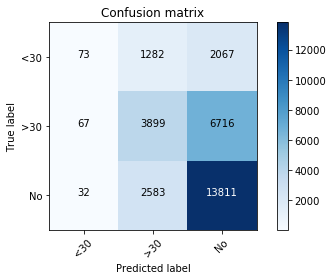

In [96]:
cnf_matrix = confusion_matrix(y_valid,y_predict, labels=[1, 2, 3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['<30', '>30', 'No'],
                      title='Confusion matrix')

# Feature selection

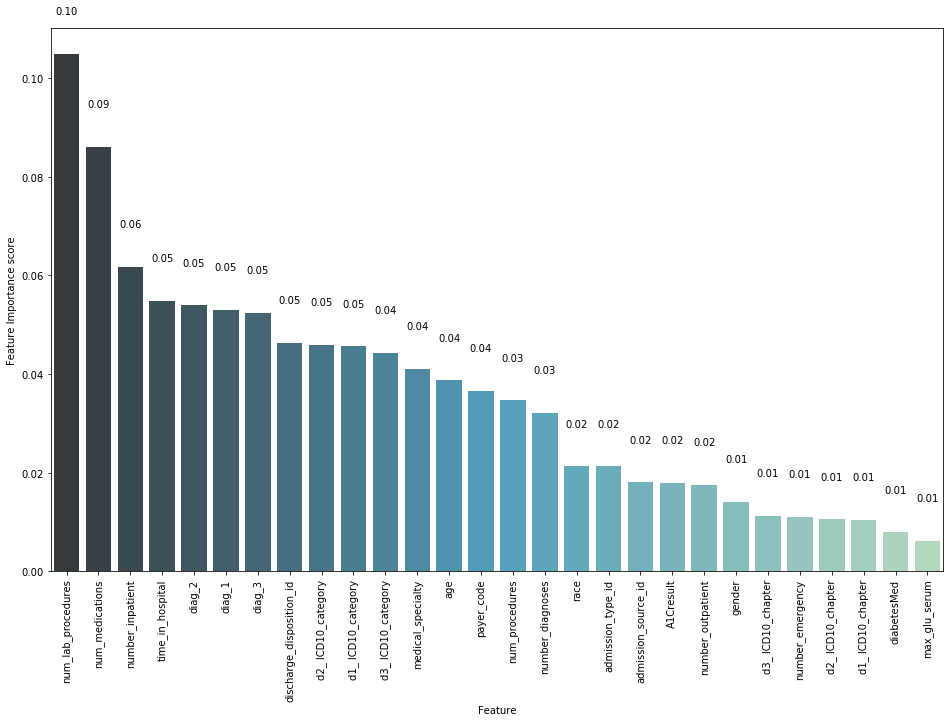

In [57]:
# plot feature importances
plt.figure(figsize=(16,10))
fi = m.feature_importances_
df_fi = pd.DataFrame(np.reshape(fi, (1,28)), columns= X.columns).T.reset_index()
df_fi.columns = ['Feature', 'Feature Importance score']
df_fi = df_fi.sort_values(by='Feature Importance score', ascending=False)
ax_features = sns.barplot(data = df_fi, x = 'Feature', y='Feature Importance score', palette='GnBu_d')#sns.set_palette(sns.color_palette('GnBu_d', 20)))
for p in ax_features.patches:
    height = p.get_height()
    ax_features.text(p.get_x()+p.get_width()/2.,
            height + 0.008,
            '{:1.2f}'.format(height),
            ha="center") 
ax_features.set_xticklabels(ax_features.get_xticklabels(), rotation=90)
plt.show()

# Hyperparameter tuning

In [97]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split. 
#'sqrt' = sqrt(number of features). 
#'auto' should also do the same
max_features = [0.5, 0.7, 0.8, 0.9] 
# Minimum number of samples required to split a node
min_samples_split = [5, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': [0.5, 0.7, 0.8, 0.9], 'min_samples_split': [5, 20, 40], 'min_samples_leaf': [3, 10, 20], 'bootstrap': [True, False]}


In [102]:
from sklearn.metrics import make_scorer
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
r_macro_scorer = make_scorer(recall_score, average='macro') 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring=r_macro_scorer, n_iter = 10, cv = 3,  random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(np.array(X_train), np.array(y_train))

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [103]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'bootstrap': False}

In [105]:
model_opt = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=3, max_features=0.5, bootstrap=False)
model_opt.fit(np.array(X_train), np.array(y_train))

y_predict = model_opt.predict(np.array(X_valid))

In [106]:
recall_score(y_valid,y_predict, average='macro')

0.41354576633217216

Confusion matrix, without normalization
[[  127  1420  1875]
 [  140  4376  6166]
 [   50  3336 13040]]


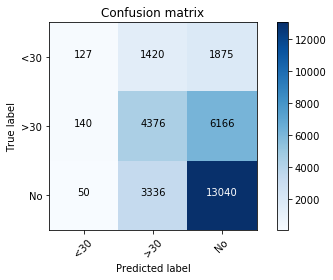

In [107]:
cnf_matrix = confusion_matrix(y_valid,y_predict, labels=[1, 2, 3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['<30', '>30', 'No'],
                      title='Confusion matrix')

# Random forest on binary outcome

In [108]:
# Create binary outcome by changing to readmitted/not readmitted
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,max_glu_serum,A1Cresult,diabetesMed,readmitted,d1_ ICD10_chapter,d1_ ICD10_category,d2_ ICD10_chapter,d2_ ICD10_category,d3_ ICD10_chapter,d3_ ICD10_category
0,2278392,8222157,4,1,0,6,25,1,1,1,...,3,3,1,3,2,96,10,618,10,639
1,149190,55629189,4,1,10,1,1,7,3,1,...,3,3,2,2,2,111,2,79,2,91
2,64410,86047875,2,1,20,1,1,7,2,1,...,3,3,2,3,6,422,2,79,12,675
3,500364,82442376,4,2,30,1,1,7,2,1,...,3,3,2,3,8,522,2,79,4,217
4,16680,42519267,4,2,40,1,1,7,1,1,...,3,3,2,3,1,55,1,25,2,87


In [110]:
df_diabetes['readmitted'] = np.where(df_diabetes['readmitted']==2,1,df_diabetes['readmitted'])
df_diabetes['readmitted'] = np.where(df_diabetes['readmitted']==3,0,df_diabetes['readmitted'])

In [111]:
# Train validation split

In [112]:
from sklearn.model_selection import train_test_split
X = df_diabetes.drop(['encounter_id','patient_nbr','readmitted'],axis=1)
y = df_diabetes.readmitted
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_train), len(X_valid)

(71236, 30530)

# Random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
m = RandomForestClassifier(random_state=0, class_weight='balanced')
m.fit(np.array(X_train), np.array(y_train))

y_predict = m.predict(np.array(X_valid))

In [114]:
#Classification metrics: we want to maximize the cases found, even if at the expense of finding more false positives
from sklearn.metrics import recall_score, confusion_matrix

In [115]:
recall_score(y_valid,y_predict)

0.5248865570051049

In [116]:
(y_valid.values==0).sum(), (y_valid.values==1).sum()

(16426, 14104)

In [117]:
(y_predict==0).sum(), (y_predict==1).sum()

(18808, 11722)

Confusion matrix, without normalization
[[12107  4319]
 [ 6701  7403]]


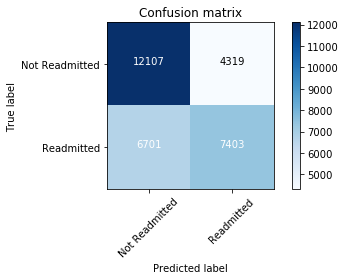

In [124]:
cnf_matrix = confusion_matrix(y_valid,y_predict, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Readmitted', 'Readmitted'],
                      title='Confusion matrix')

# Feature selection

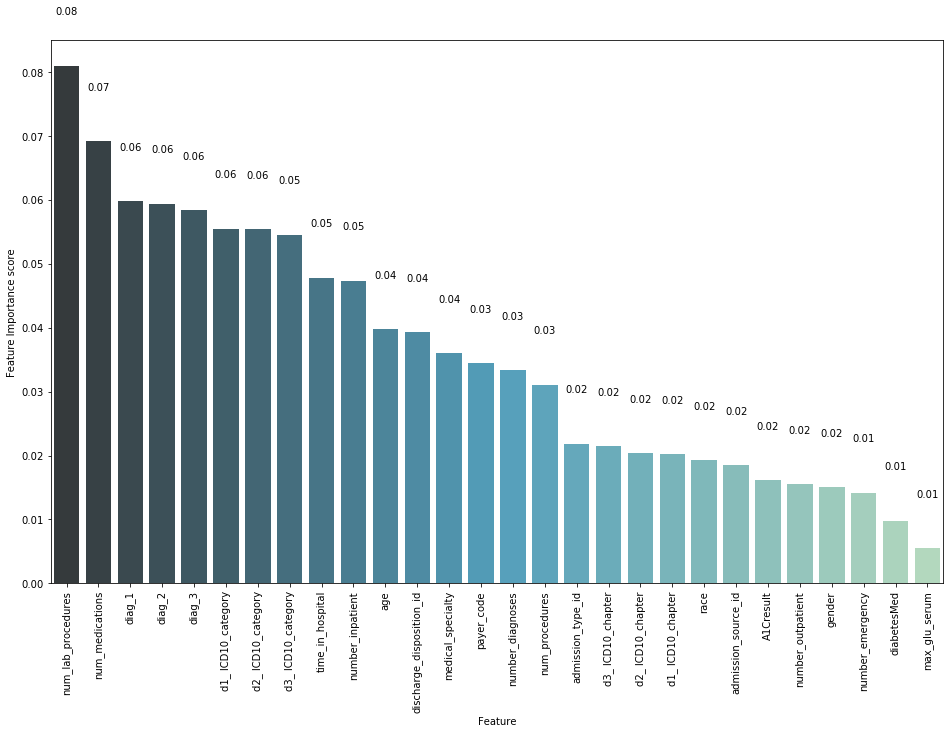

In [125]:
# plot feature importances
plt.figure(figsize=(16,10))
fi = m.feature_importances_
df_fi = pd.DataFrame(np.reshape(fi, (1,28)), columns= X.columns).T.reset_index()
df_fi.columns = ['Feature', 'Feature Importance score']
df_fi = df_fi.sort_values(by='Feature Importance score', ascending=False)
ax_features = sns.barplot(data = df_fi, x = 'Feature', y='Feature Importance score', palette='GnBu_d')#sns.set_palette(sns.color_palette('GnBu_d', 20)))
for p in ax_features.patches:
    height = p.get_height()
    ax_features.text(p.get_x()+p.get_width()/2.,
            height + 0.008,
            '{:1.2f}'.format(height),
            ha="center") 
ax_features.set_xticklabels(ax_features.get_xticklabels(), rotation=90)
plt.show()

# Hyperparameter tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split. 
#'sqrt' = sqrt(number of features). 
#'auto' should also do the same
max_features = [0.5, 0.7, 0.8, 0.9] 
# Minimum number of samples required to split a node
min_samples_split = [5, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': [0.5, 0.7, 0.8, 0.9], 'min_samples_split': [5, 20, 40], 'min_samples_leaf': [3, 10, 20], 'bootstrap': [True, False]}


In [127]:
from sklearn.metrics import make_scorer
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='recall', n_iter = 10, cv = 3,  random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(np.array(X_train), np.array(y_train))

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [128]:
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 0.7,
 'bootstrap': False}

In [129]:
model_opt = RandomForestClassifier(n_estimators=80, min_samples_split=20, min_samples_leaf=10, max_features=0.7, bootstrap=False)
model_opt.fit(np.array(X_train), np.array(y_train))

y_predict = model_opt.predict(np.array(X_valid))

In [130]:
recall_score(y_valid,y_predict)

0.5566505955757232

Confusion matrix, without normalization
[[11563  4863]
 [ 6253  7851]]


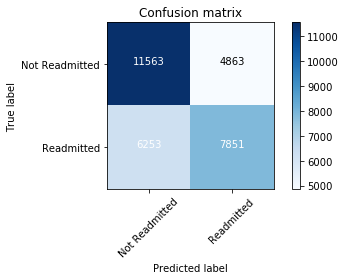

In [131]:
cnf_matrix = confusion_matrix(y_valid,y_predict, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Readmitted', 'Readmitted'],
                      title='Confusion matrix')